# Artistic Style Transfer

## Import Libraries

In [1]:
#importing required libraries
import numpy as np
import math
from PIL import Image
from helper_funcs.vgg import VGG
import tensorflow as tf
from helper_funcs.helper import *
import matplotlib.pyplot as plt
import scipy.misc
from time import time
%matplotlib inline

## Paramaters

In [2]:
#content file path
c_path = "./data/content_images/Eiffel-Tower-Paris.jpg"

#style file path
s_path ="./data/style_images/style.jpg"

#mat file to load vgg path
vgg_path = './model/vgg_19/imagenet-vgg-verydeep-19.mat'

# output file name
output_path = "./data/output/outfile.jpg"

#style weights for individual layers
weights =[0.3,0.1,0.2,0.3,0.1]

#total content weight
weight_c= 10

#total style weight 
weight_s = 500000

#image dimensions
image_height = 300
image_width = 300
channels = 3

#training epochs and learning rate
num_epochs = 1000
learning_rate = 1

## Read Image

In [3]:
# read the content and style image
content_img = read_image(location = c_path, width = image_width, height = image_height)
style_img = read_image(location = s_path, width = image_width, height = image_height)

# convert into numpy array
c_img = np.array(content_img)
s_img = np.array(style_img)

# generate white noise image
white_noise_img = white_noise(height=image_height, width = image_width, channels= channels, content_image = c_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


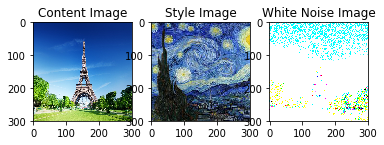

In [4]:
#plot content, style and white noise images
fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Content Image")
plt.imshow(content_img)
plt.subplot(1, 3, 2)
plt.title("Style Image")
plt.imshow(style_img)
plt.subplot(1,3, 3)
plt.title("White Noise Image")
plt.imshow(white_noise_img)

In [5]:
# convert into required dimensions for input to vgg
c_img = c_img[np.newaxis,...]
s_img = s_img[np.newaxis,...]
white_noise_img = white_noise_img[np.newaxis,...]

print("Content Image shape: " + str(c_img.shape))
print("Style Image shape: " + str(s_img.shape))
print("White Noise Image shape:" + str(white_noise_img.shape))

Content Image shape: (1, 300, 300, 3)
Style Image shape: (1, 300, 300, 3)
White Noise Image shape:(1, 300, 300, 3)


## Define Model

In [6]:
# content layer to calculate loss from
content_layer = "relu3_2"

# list of style layers to calculate loss from
style_layers = ["relu1_1", "relu2_1", "relu3_1","relu4_1","relu5_1"]

In [7]:
# time module to find the time taken to run the function
start = time()

# training function with the following paramaters:
## - white noise image
## - content image
## - style image
## - list of style layers to calculate loss from
## - content layer to calculate loss from
## - contribution of each style layer to the total loss
## - total content weight
## - total style weight
## - vgg model path
## - number of epochs to train
## - learning rate for the optimizer
## - output path to save the final image

train(white_noise_img, c_img, s_img, style_layers, content_layer,weights,weight_c, weight_s, vgg_path, num_epochs , learning_rate, output_path)
end = time()
print("Took" + str(end-start) + " seconds to train.")

Epoch: 1 Loss = 103910250000000.0
Epoch: 100 Loss = 3601090700000.0
Epoch: 200 Loss = 2165859300000.0
Epoch: 300 Loss = 1791407200000.0
Epoch: 400 Loss = 1811329700000.0
Epoch: 500 Loss = 1262152000000.0
Epoch: 600 Loss = 1397136200000.0
Epoch: 700 Loss = 1352822400000.0
Epoch: 800 Loss = 1196703100000.0
Epoch: 900 Loss = 1033212800000.0
Epoch: 1000 Loss = 1847606200000.0
Took156.0676896572113 seconds to train.


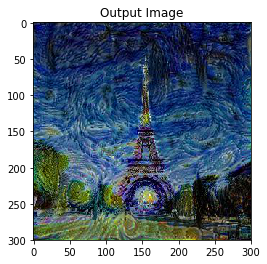

In [8]:
output_image = read_image(location = output_path, width = image_width, height = image_height)
plt.title("Output Image")
plt.imshow(output_image)